## Determine whether client has a term deposit or not.

### Import Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set_theme(context='notebook', style='darkgrid', palette='deep', font='sans-serif', font_scale=1, color_codes=True, rc=None)


from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn import preprocessing
from sklearn import metrics

from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score 

import warnings
warnings.filterwarnings('ignore')

### EDA

In [2]:
bank_data=pd.read_csv('bank-full.csv',delimiter=";")

In [3]:
bank_data.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [4]:
bank_data['job'].unique()

array(['management', 'technician', 'entrepreneur', 'blue-collar',
       'unknown', 'retired', 'admin.', 'services', 'self-employed',
       'unemployed', 'housemaid', 'student'], dtype=object)

In [5]:
bank_data.describe().T

,count,mean,std,min,25%,50%,75%,max
age,45211.0,40.936210,10.618762,18.0,33.0,39.0,48.0,95.0
balance,45211.0,1362.272058,3044.765829,-8019.0,72.0,448.0,1428.0,102127.0
day,45211.0,15.806419,8.322476,1.0,8.0,16.0,21.0,31.0
duration,45211.0,258.163080,257.527812,0.0,103.0,180.0,319.0,4918.0
campaign,45211.0,2.763841,3.098021,1.0,1.0,2.0,3.0,63.0
pdays,45211.0,40.197828,100.128746,-1.0,-1.0,-1.0,-1.0,871.0
previous,45211.0,0.580323,2.303441,0.0,0.0,0.0,0.0,275.0


In [6]:
bank_data.shape   

(45211, 17)

X=bank_data.iloc[:,:-1]  # upto last column
Y=bank_data.iloc[:,-1]   # last column

In [7]:
bank_data

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,technician,married,tertiary,no,825,no,no,cellular,17,nov,977,3,-1,0,unknown,yes
45207,71,retired,divorced,primary,no,1729,no,no,cellular,17,nov,456,2,-1,0,unknown,yes
45208,72,retired,married,secondary,no,5715,no,no,cellular,17,nov,1127,5,184,3,success,yes
45209,57,blue-collar,married,secondary,no,668,no,no,telephone,17,nov,508,4,-1,0,unknown,no


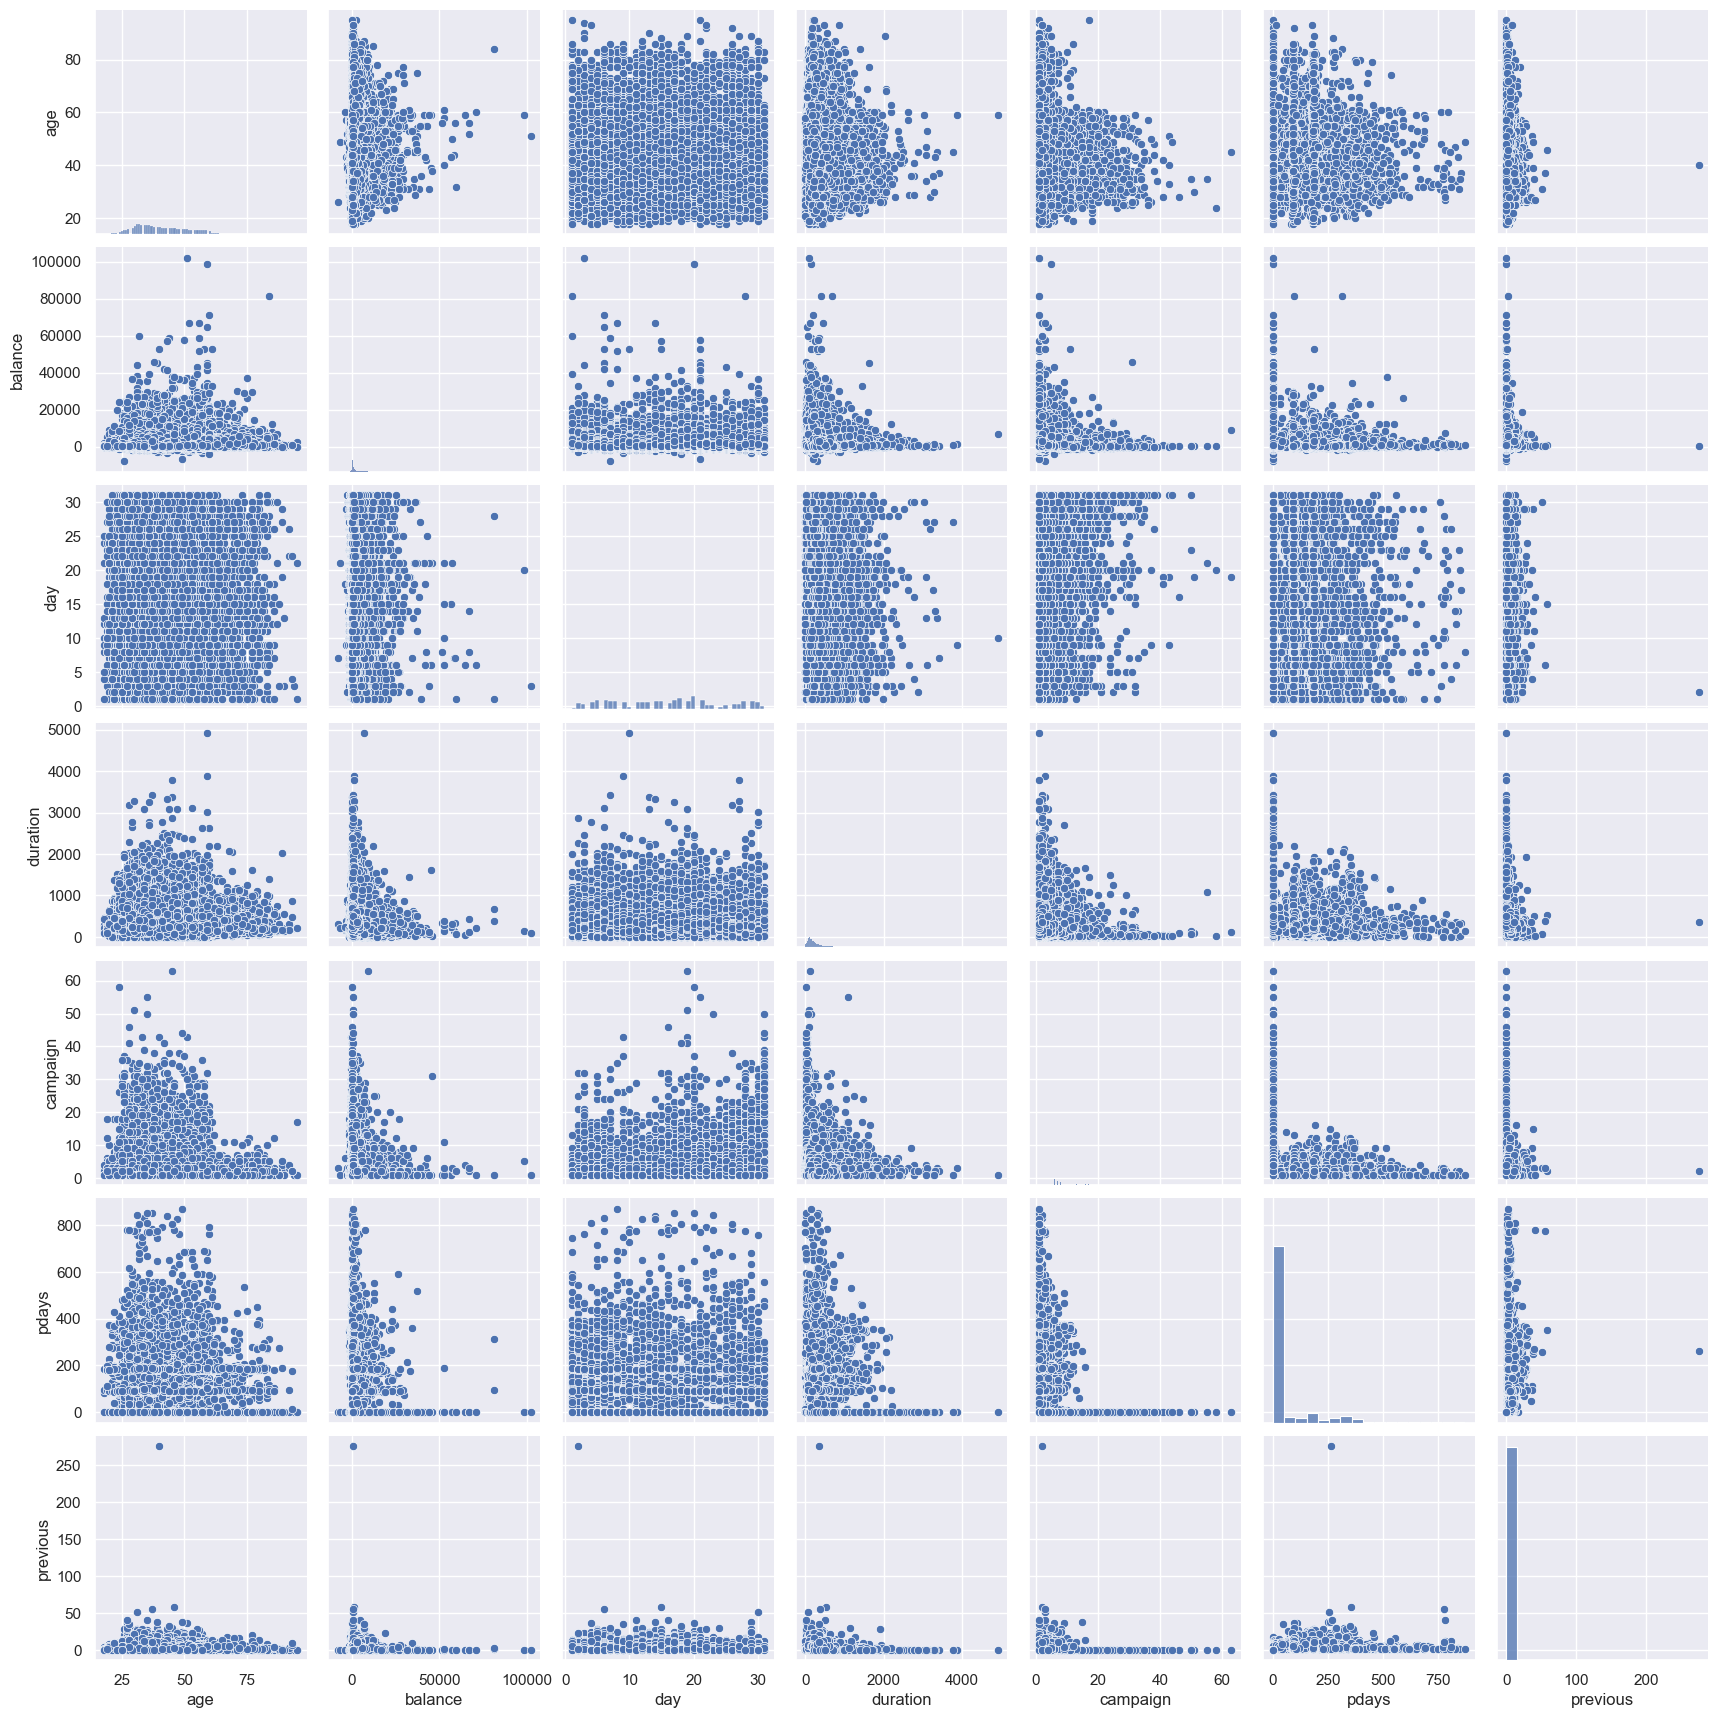

In [8]:
sns.pairplot(bank_data)

In [31]:
#Checking counts of "yes" and "no" for dependent variable:-
bank_data["y"].value_counts()

0    26594
1     1599
Name: y, dtype: int64

In [10]:
##Checking null values:-
bank_data.isnull().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

<Axes: >

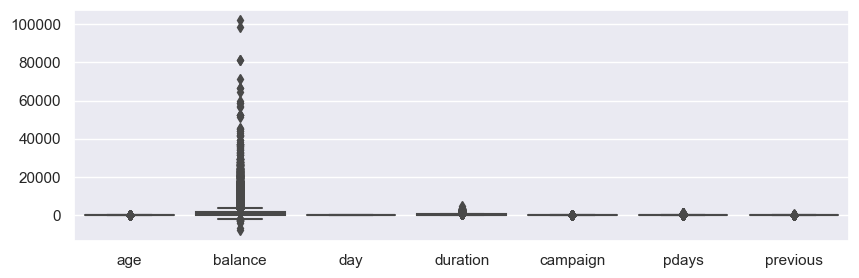

In [11]:
##Checking the outliers:-
plt.figure(figsize=(10,3))
sns.boxplot(data=bank_data)

In [12]:
#IQR Method used for remove outlier:-

Q1 = bank_data.quantile(0.25)

Q3 = bank_data.quantile(0.75)

IQR = Q3 - Q1

bank_data = bank_data[~((bank_data < (Q1 - 1.5 * IQR)) | (bank_data > (Q3 + 1.5 * IQR))).any(axis=1)]

bank_data.shape

(28193, 17)

<Axes: >

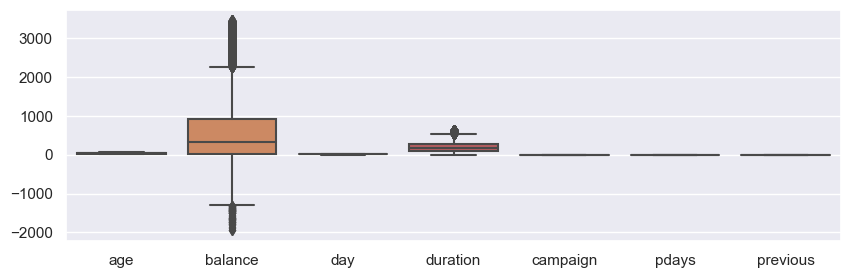

In [13]:
##Checking the outliers:-
plt.figure(figsize=(10,3))
sns.boxplot(data=bank_data)

In [14]:
#Replace "yes" and "no" in dependent variable(y) changes into 1 and 0:-
bank_data.y.replace(to_replace=['yes','no'], value = [1,0],inplace = True)

In [15]:
bank_data["y"].value_counts()

0    26594
1     1599
Name: y, dtype: int64

In [16]:
bank_data = bank_data[['y','age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
                   'loan', 'contact', 'day', 'month','duration','campaign', 'pdays','previous', 'poutcome']]

In [17]:
bank_data

,y,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome
0,0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown
1,0,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown
2,0,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown
3,0,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown
4,0,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45198,0,37,management,married,tertiary,no,1428,no,no,cellular,16,nov,333,2,-1,0,unknown
45202,1,34,admin.,single,secondary,no,557,no,no,cellular,17,nov,224,1,-1,0,unknown
45203,1,23,student,single,tertiary,no,113,no,no,cellular,17,nov,266,1,-1,0,unknown
45205,1,25,technician,single,secondary,no,505,no,yes,cellular,17,nov,386,2,-1,0,unknown


In [18]:
bank_data= pd.get_dummies(bank_data,columns=['job', 'marital', 'education', 'default', 'housing','loan', 'contact','month', 'poutcome'])

In [19]:
bank_data

,y,age,balance,day,duration,campaign,pdays,previous,job_admin.,job_blue-collar,...,month_feb,month_jan,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,poutcome_unknown
0,0,58,2143,5,261,1,-1,0,0,0,...,0,0,0,0,0,1,0,0,0,1
1,0,44,29,5,151,1,-1,0,0,0,...,0,0,0,0,0,1,0,0,0,1
2,0,33,2,5,76,1,-1,0,0,0,...,0,0,0,0,0,1,0,0,0,1
3,0,47,1506,5,92,1,-1,0,0,1,...,0,0,0,0,0,1,0,0,0,1
4,0,33,1,5,198,1,-1,0,0,0,...,0,0,0,0,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45198,0,37,1428,16,333,2,-1,0,0,0,...,0,0,0,0,0,0,1,0,0,1
45202,1,34,557,17,224,1,-1,0,1,0,...,0,0,0,0,0,0,1,0,0,1
45203,1,23,113,17,266,1,-1,0,0,0,...,0,0,0,0,0,0,1,0,0,1
45205,1,25,505,17,386,2,-1,0,0,0,...,0,0,0,0,0,0,1,0,0,1


### Model Building

In [20]:
#dividing data into target varibale and features
X = bank_data.iloc[:,1::]
Y = bank_data.iloc[:,0]

In [21]:
X.head(5)

,age,balance,day,duration,campaign,pdays,previous,job_admin.,job_blue-collar,job_entrepreneur,...,month_feb,month_jan,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,poutcome_unknown
0,58,2143,5,261,1,-1,0,0,0,0,...,0,0,0,0,0,1,0,0,0,1
1,44,29,5,151,1,-1,0,0,0,0,...,0,0,0,0,0,1,0,0,0,1
2,33,2,5,76,1,-1,0,0,0,1,...,0,0,0,0,0,1,0,0,0,1
3,47,1506,5,92,1,-1,0,0,1,0,...,0,0,0,0,0,1,0,0,0,1
4,33,1,5,198,1,-1,0,0,0,0,...,0,0,0,0,0,1,0,0,0,1


In [22]:
Y.head(5)

0    0
1    0
2    0
3    0
4    0
Name: y, dtype: int64

In [23]:
#Logistic Regression and fit the model
model = LogisticRegression()
model.fit(X,Y)

LogisticRegression()

In [24]:
y_pred=model.predict(X)
y_pred

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [25]:
y_pred_df = pd.DataFrame({'Actual':Y,'Predicted_values':model.predict(X)})
y_pred_df.head()

,Actual,Predicted_values
0,0,0
1,0,0
2,0,0
3,0,0
4,0,0


In [26]:
y_pred_df["Actual"].value_counts()

0    26594
1     1599
Name: Actual, dtype: int64

In [27]:
y_pred_df["Predicted_values"].value_counts()

0    27871
1      322
Name: Predicted_values, dtype: int64

In [28]:
#Confusion Matrix for the model accuracy
confusion_matrix = confusion_matrix(Y,y_pred)
print(confusion_matrix)

[[26428   166]
 [ 1443   156]]


In [29]:
#Accuracy of the model:-
round(accuracy_score(Y,y_pred),2)

0.94

In [30]:
#Classification Report
print(classification_report(Y,y_pred))

              precision    recall  f1-score   support

           0       0.95      0.99      0.97     26594
           1       0.48      0.10      0.16      1599

    accuracy                           0.94     28193
   macro avg       0.72      0.55      0.57     28193
weighted avg       0.92      0.94      0.92     28193

